In [1]:
import os
import sys
import copy

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from AdsorptionBreakthroughAnalysis import *

# below is just to make the output clearer
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

# Step 1. Initialise `experiment_analysis` with experimental data

The `experiment_analysis` must be initialised with input data.

An example can be seen in the following cell

In [2]:
ExperimentalSetup["breakthrough_start"] = 7148 # seconds
ExperimentalSetup["breakthrough_end"] = 18525 # seconds
ExperimentalSetup["LowConcCo2"] = True
ExperimentalSetup["Coriolis_start"] = 14 # seconds
ExperimentalSetup["MS_header_row"] = 27 # Which row is the head in the MS.csv (i.e. the row with Time, Carbon dioxide, etc) 
coriolis_file_name = "Lewatit_Dry_25C_1%CO220230502133217.txt" # path to coriolis txt
MS_file_name = "Lewatit_Dry_25C_1%CO220230502133217.csv" # path to MS csv

MS_columns_to_rename = { # if the MS columns are not in the expected form, then rename them
    "Scan 1 : He 4.00": "Helium", # for example 'Scam 1: He 4.00' is an output from the MS, this should be renamed as Helium
    "Scan 2 : water 18.00": "Water",
    "Scan 3 : Nitrogen 28.00": "Nitrogen",
    "Scan 4 : Oxygen 32.00": "Oxygen",
    "Scan 5 : CO2 44.00": "Carbon dioxide",
    "Scan 6 : none 0.40": "None",
}

ad_obj = experiment_analysis(
    coriolis_file_name=coriolis_file_name,
    MS_file_name=MS_file_name,
    conditions=copy.deepcopy(ExperimentalSetup),
    MS_columns_to_rename = MS_columns_to_rename, # remove this line if no renaming is needed
)

# Step 2. Generate breakthrough curves

In [3]:
df_breakthrough = ad_obj.get_breakthrough() # produces breakthrough data
df_breakthrough.to_csv('breakthrough_data.csv') # saves breakthrough data to file

updated code used, RS are: 0.19290384316466105 1 0.38194644641851655


# Step 3. Plot breakthrough

The cell below is an example of a breakthrough plot.

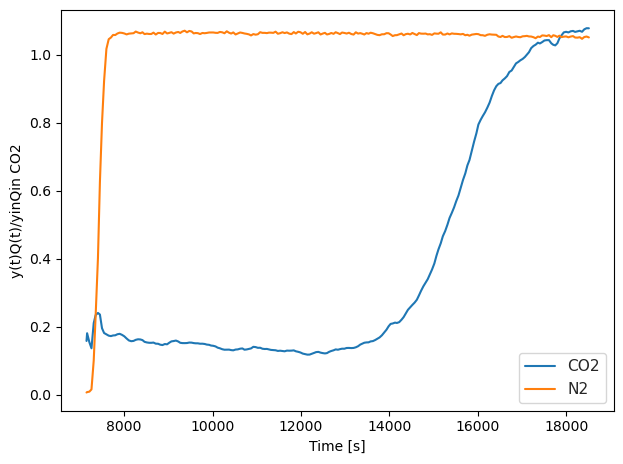

In [4]:
fig,ax = plt.subplots(1,1)

sns.set_theme(style = 'white',palette = None)
sns.lineplot(
    data = df_breakthrough,
    x = "Time [s]",
    y = "y(t)Q(t)/yinQin CO2",
    label = 'CO2',
    ax = ax,
)
sns.lineplot(
    data = df_breakthrough,
    x = "Time [s]",
    y = "y(t)Q(t)/yinQin N2",
    label = 'N2',
    ax = ax,
)
ax.legend()

plt.tight_layout()

plt.savefig('CO2_N2_breakthrough_plot.png') # saves the plot

# Step 4. Additional tasks you may want to do

Processed MS and FM data can be obtained by the below.

In [5]:
ad_obj.get_raw_MS()

,Helium,Water,Nitrogen,Oxygen,Carbon dioxide,None,Unnamed: 8,Time [s]
0,1.071840e-06,6.629900e-08,2.209990e-08,0.000000e+00,4.088500e-09,-8.839990e-10,NaN,1.002
1,1.005540e-06,6.187900e-08,3.314990e-09,-1.104990e-09,4.464200e-09,-4.088490e-10,NaN,11.277
2,9.514040e-07,5.292940e-08,7.071990e-09,-5.082990e-09,4.656470e-09,2.320490e-11,NaN,21.635
3,8.928390e-07,4.787960e-08,5.210070e-09,1.110520e-09,4.664210e-09,4.640990e-12,NaN,31.990
4,7.351560e-07,3.576330e-08,4.171920e-09,8.002950e-10,3.613350e-09,5.734940e-12,NaN,64.354
...,...,...,...,...,...,...,...,...
375,2.225460e-07,1.148090e-10,2.654200e-07,1.182340e-10,5.250960e-10,-2.257510e-12,NaN,18359.324
376,2.185680e-07,1.106320e-10,2.659730e-07,9.936100e-11,5.277480e-10,-3.700640e-12,NaN,18409.460
377,2.202260e-07,9.127200e-11,2.581270e-07,1.004000e-10,5.184660e-10,-4.570270e-12,NaN,18461.720
378,2.171320e-07,8.479700e-11,2.595640e-07,9.611200e-11,5.213390e-10,2.810010e-12,NaN,18514.008


In [6]:
ad_obj.get_raw_FM()

,CO2,He,N2,Outlet,Time [s]
0,0.0,30.00625,0.0,0.015625,14.000000
1,0.0,30.00625,0.0,0.015625,14.100006
2,0.0,30.00312,0.0,0.018750,14.200011
3,0.0,30.00312,0.0,0.018750,14.300017
4,0.0,30.00312,0.0,0.018750,14.400023
...,...,...,...,...,...
180222,0.0,0.00000,0.0,4.443750,18603.310000
180223,0.0,0.00000,0.0,4.421875,18603.410000
180224,0.0,0.00000,0.0,4.421875,18603.510000
180225,0.0,0.00000,0.0,4.406250,18603.610000


These can be saved by typing the below:

`ad_obj.get_raw_MS().to_csv('MS_filename.csv')`


`ad_obj.get_raw_FM().to_csv('FM_filename.csv')`